In [1]:
import os,sys, pathlib, time, subprocess
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import re



folder_path = pathlib.Path().resolve()
planing_path = folder_path.parent
problem_path = folder_path / "Problemas"
print("Current folder path:", folder_path)

sizes = []
times = []
steps = []
step_pattern = re.compile(r"\s*\d+\s*:")


Current folder path: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1


In [2]:

max_time = 60  # Tiempo máximo en segundos para cada resolución
size = 2
time_exceeded = False
max_size = 0


if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{planing_path}/planificadores/ff",
        "-o", f"{folder_path}/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True
        
    os.remove(problem_pddl)

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")



Resolviendo tamaños: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[OK] Plan encontrado para tamaño 2 en 0.0061 segundos con 6 pasos.

[INFO] Generando problema para tamaño 3...
[OK] Plan encontrado para tamaño 3 en 0.0027 segundos con 10 pasos.

[INFO] Generando problema para tamaño 4...
[OK] Plan encontrado para tamaño 4 en 0.0030 segundos con 13 pasos.

[INFO] Generando problema para tamaño 5...
[OK] Plan encontrado para tamaño 5 en 0.0037 segundos con 18 pasos.

[INFO] Generando problema para tamaño 6...
[OK] Plan encontrado para tamaño 6 en 0.0047 segundos con 21 pasos.

[INFO] Generando problema para tamaño 7...
[OK] Plan encontrado para tamaño 7 en 0.0072 segundos con 22 pasos.

[INFO] Generando problema para tamaño 8...
[OK] Plan encontrado para tamaño 8 en 0.0113 segundos con 26 pasos.

[INFO] Generando problema para tamaño 9...
[OK] Plan encontrado para tamaño 9 en 0.0152 segundos con 30 pasos.

[INFO] Generando problema para tamaño 10...
[OK] Plan encontrado para tamaño 10 en 0.0343 segundos con 3

In [3]:

max_time = 60  # Tiempo máximo en segundos para cada resolución
size = max_size + 1  # Comenzar desde el tamaño máximo encontrado
time_exceeded = False
max_size = 0

problem_path = folder_path / "Problemas"
if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{planing_path}/planificadores/ff",
        "-o", f"{folder_path}/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True
        
    os.remove(problem_pddl)

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")



Resolviendo tamaños: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 41...
[OK] Plan encontrado para tamaño 41 en 32.3306 segundos con 152 pasos.

[INFO] Generando problema para tamaño 42...
[OK] Plan encontrado para tamaño 42 en 25.0107 segundos con 154 pasos.

[INFO] Generando problema para tamaño 43...
[OK] Plan encontrado para tamaño 43 en 53.6866 segundos con 160 pasos.

[INFO] Generando problema para tamaño 44...
[OK] Plan encontrado para tamaño 44 en 59.4602 segundos con 152 pasos.

[INFO] Generando problema para tamaño 45...
[OK] Plan encontrado para tamaño 45 en 45.3385 segundos con 162 pasos.

[INFO] Generando problema para tamaño 46...
[TIMEOUT] Tiempo excedido (60s) para tamaño 46.

>>> El mayor tamaño resuelto en menos de 1 minuto es: 45


In [4]:
print(sizes)
print(times)
print(steps)
print(len(sizes), len(times), len(steps))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
[0.006120920181274414, 0.002658843994140625, 0.0030281543731689453, 0.003708362579345703, 0.004694938659667969, 0.0071506500244140625, 0.011317968368530273, 0.015170812606811523, 0.034311771392822266, 0.03819108009338379, 0.051551103591918945, 0.08682847023010254, 0.05941367149353027, 0.297438383102417, 0.263336181640625, 0.2132275104522705, 0.839747428894043, 0.49568963050842285, 0.8294556140899658, 0.5444145202636719, 0.9482312202453613, 1.4864253997802734, 1.881089210510254, 1.9313807487487793, 3.2163655757904053, 9.823060274124146, 5.578264951705933, 4.939118385314941, 4.359203100204468, 6.488828182220459, 9.198427200317383, 10.756210803985596, 10.409137487411499, 19.82672095298767, 16.89243459701538, 19.76789093017578, 24.298828840255737, 24.741758346557617, 48.66243648529053, 32.33057260513306, 25.01071071624756, 

In [5]:
results_csv_path = folder_path / "Resultados/resultadosff.csv"
if not results_csv_path.parent.exists():
    os.makedirs(results_csv_path.parent)
    
new_df = pd.DataFrame({'Tamaño': sizes, 'Tiempo (s)': times, 'Pasos': steps})

if results_csv_path.exists():
    old_df = pd.read_csv(results_csv_path)
    combined_df = pd.concat([old_df, new_df], ignore_index=True)

    # Calcular la media de tiempo por tamaño
    tiempo_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()

    # Obtener el máximo de pasos por tamaño
    pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()

    # Unir ambos resultados en un solo DataFrame
    final_df = tiempo_df.merge(pasos_df, on='Tamaño')
else:
    final_df = new_df

final_df.to_csv(results_csv_path, index=False)
print(f"Resultados exportados a {results_csv_path}")


Resultados exportados a /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Resultados/resultadosff.csv


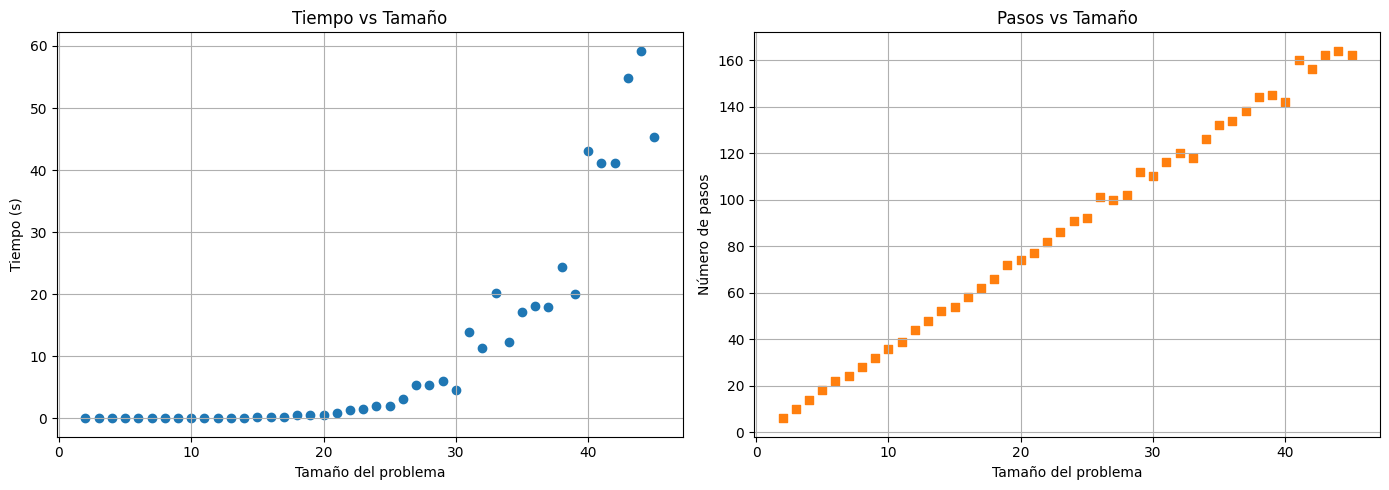

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos desde el archivo CSV exportado
results = pd.read_csv("/home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Resultados/resultadosff.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# LPG-TD

In [7]:


planner_name = "LPG-TD"
planner_cmd = [
    f"{planing_path}/planificadores/lpg-td",
    "-n", "1",
    "-o", f"{folder_path}/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = (
        f"python3 {folder_path}/generate_problem.py "
        f"-d 1 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    )
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            plan_output = result.stdout
            # Contar líneas válidas de plan (ignorando comentarios)
            num_steps = sum(
                1
                for line in plan_output.strip().split("\n")
                if line.strip() and not line.startswith(";") and "(" in line
            )

            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            outputs.append(plan_output[:500])  # guardar solo primeros 500 caracteres
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador LPG-TD para tamaño 2...

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador LPG-TD para tamaño 3...

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador LPG-TD para tamaño 4...

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador LPG-TD para tamaño 5...

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador LPG-TD para tamaño 6...

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador LPG-TD para tamaño 7...

[INFO] Generando problema para tamaño 8...
[INFO] Ejecutando planificador LPG-TD para tamaño 8...

[INFO] Generando problema para tamaño 9...
[INFO] Ejecutando planificador LPG-TD para tamaño 9...

[INFO] Generando problema para tamaño 10...
[INFO] Ejecutando planificador LPG-TD para tamaño 10...

[INFO] Generando problema para tamaño 11...
[INFO] Ejecutando planificador LPG-TD para tamaño 11...

[INFO

  File "/home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/generate_problem.py", line 108
    default=2, help='capacidad máxima de cajas por dron (no usado en este dominio, se ignora)')
                                                                                              ^
SyntaxError: unmatched ')'


,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.090642,10,LPG-TD
1,3,0.080236,13,LPG-TD
2,4,0.078626,18,LPG-TD
3,5,0.078940,20,LPG-TD
4,6,0.081275,25,LPG-TD
...,...,...,...,...
112,114,14.448562,465,LPG-TD
113,115,28.458961,443,LPG-TD
114,116,23.538181,451,LPG-TD
115,117,30.381614,457,LPG-TD



Salida fragmento para LPG-TD tamaño 118:



NUMERIC_THREATS_MODE: 0

; Command line: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/planificadores/lpg-td -n 1 -o /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/dron-domain.pddl -f /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Problemas/drone_problem_d1_l118_p118_c118_g118_ct2.pddl   


Parsing domain file:  domain 'DRONE-DOMAIN' defined ... done.
Parsing problem file:  problem 'DRONE_PROBLEM_D1_L118_P118_C118_G118_CT2' defin


In [8]:
print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])


=== Resumen de resultados ===

Tamaño máximo resuelto por LPG-TD: 118
Resultados de LPG-TD exportados a /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Resultados/resultados_lpg-td.csv


,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.090642,10,LPG-TD
1,3,0.080236,13,LPG-TD
2,4,0.078626,18,LPG-TD
3,5,0.078940,20,LPG-TD
4,6,0.081275,25,LPG-TD
...,...,...,...,...
112,114,14.448562,465,LPG-TD
113,115,28.458961,443,LPG-TD
114,116,23.538181,451,LPG-TD
115,117,30.381614,457,LPG-TD



Salida fragmento para LPG-TD tamaño 118:



NUMERIC_THREATS_MODE: 0

; Command line: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/planificadores/lpg-td -n 1 -o /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/dron-domain.pddl -f /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Problemas/drone_problem_d1_l118_p118_c118_g118_ct2.pddl   


Parsing domain file:  domain 'DRONE-DOMAIN' defined ... done.
Parsing problem file:  problem 'DRONE_PROBLEM_D1_L118_P118_C118_G118_CT2' defin


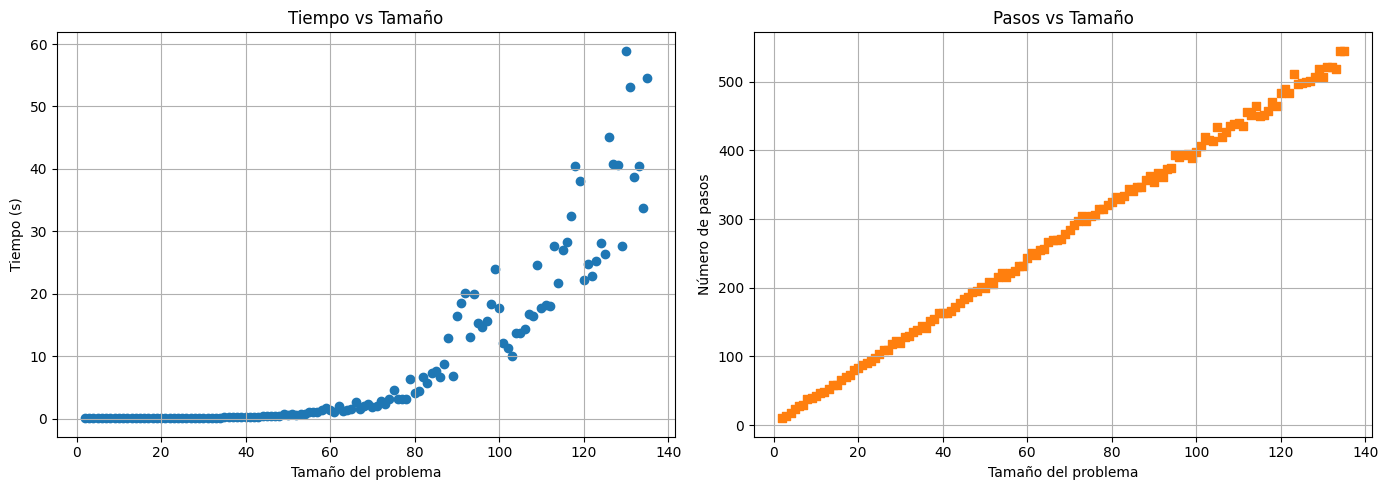

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos desde el archivo CSV exportado
results = pd.read_csv(folder_path / "Resultados/resultados_lpg-td.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# SGPLAN40

In [11]:


from pathlib import Path

planner_name = "SGPLAN40"
planner_cmd = [
    f"{planing_path}/planificadores/sgplan40",
    "-o", f"{folder_path}/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = (
        f"python3 {folder_path}/generate_problem.py "
        f"-d 1 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    )
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])
# Mostrar resultados finales
print("\n=== Resultados finales ===\n")


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 2...

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 3...

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 4...

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 5...

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 6...

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 7...

[INFO] Generando problema para tamaño 8...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 8...

[INFO] Generando problema para tamaño 9...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 9...

[INFO] Generando problema para tamaño 10...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 10...

[INFO] Generando problema para tamaño 11...
[INFO] Ejecutando planificador SGPLAN40 para

,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.010450,470,SGPLAN40
1,3,0.002125,470,SGPLAN40
2,4,0.003838,470,SGPLAN40
3,5,0.003744,470,SGPLAN40
4,6,0.003020,470,SGPLAN40
...,...,...,...,...
95,97,41.891536,470,SGPLAN40
96,98,29.545166,470,SGPLAN40
97,99,51.625933,470,SGPLAN40
98,100,56.522043,470,SGPLAN40



=== Resultados finales ===



In [14]:
# Expresión regular para encontrar archivos con el patrón solicitado
soln_pattern = re.compile(r"drone_problem_d1_l(\d+)_p\1_c\1_g\1_ct2\.pddl\.soln$")
step_line_pattern = re.compile(r"^\d+\.\d+:")  # líneas que empiezan por un decimal y dos puntos

# Leer el CSV existente
df_csv = pd.read_csv(csv_path)

# Crear un diccionario Tamaño -> índice en el DataFrame
size_to_idx = {row['Tamaño']: idx for idx, row in df_csv.iterrows()}

# Recorrer archivos en el directorio
for file in os.listdir(folder_path):
    match = soln_pattern.match(file)
    if match:
        size = int(match.group(1))
        file_path = folder_path / file
        with open(file_path, "r") as f:
            file_content = f.read()
            step_count = sum(
                1 for line in file_content.splitlines()
                if line.strip() and not line.strip().startswith(";") and "(" in line
            )
            print(file_content)
            print(step_count)
        # Añadir/actualizar la columna 'Pasos' en el DataFrame
        if size in size_to_idx:
            df_csv.at[size_to_idx[size], 'Pasos'] = step_count
        else:
            # Si no existe la fila, opcionalmente agregarla
            df_csv = pd.concat([df_csv, pd.DataFrame([{'Tamaño': size, 'Pasos': step_count}])], ignore_index=True)

# Guardar el CSV actualizado
df_csv.to_csv(csv_path, index=False)
print(f"Actualizado el número de pasos en {csv_path}")

#delete all .soln files
soln_files = folder_path.glob("*.soln")
for soln_file in soln_files:
    try:
        os.remove(soln_file)
        print(f"[INFO] Eliminado archivo solución: {soln_file}")
    except Exception as e:
        print(f"[ERROR] No se pudo eliminar {soln_file}: {e}")



; Time 10.24
; ParsingTime 0.00
; NrActions 335
; MakeSpan
; MetricValue

	 0.010:  (CARGAR_RIGHT DRON1 CRATE33 DEPOSITO)[0.000]
	 0.020:  (CARGAR_LEFT DRON1 CRATE77 DEPOSITO)[0.000]
	 0.030:  (MOVER-DRONE DRON1 DEPOSITO LOC73)[0.000]
	 0.040:  (ENTREGAR-LEFT PERSON9 CRATE77 MEDICINA LOC73 DRON1)[0.000]
	 0.050:  (MOVER-DRONE DRON1 LOC73 LOC31)[0.000]
	 0.060:  (ENTREGAR-RIGHT PERSON23 CRATE33 COMIDA LOC31 DRON1)[0.000]
	 0.070:  (MOVER-DRONE DRON1 LOC31 LOC28)[0.000]
	 0.080:  (MOVER-DRONE DRON1 LOC28 DEPOSITO)[0.000]
	 0.090:  (CARGAR_RIGHT DRON1 CRATE32 DEPOSITO)[0.000]
	 0.100:  (CARGAR_LEFT DRON1 CRATE76 DEPOSITO)[0.000]
	 0.110:  (MOVER-DRONE DRON1 DEPOSITO LOC32)[0.000]
	 0.120:  (ENTREGAR-LEFT PERSON10 CRATE76 MEDICINA LOC32 DRON1)[0.000]
	 0.130:  (MOVER-DRONE DRON1 LOC32 LOC30)[0.000]
	 0.140:  (MOVER-DRONE DRON1 LOC30 DEPOSITO)[0.000]
	 0.150:  (CARGAR_LEFT DRON1 CRATE75 DEPOSITO)[0.000]
	 0.160:  (MOVER-DRONE DRON1 DEPOSITO LOC1)[0.000]
	 0.170:  (ENTREGAR-LEFT PERSON12 CR

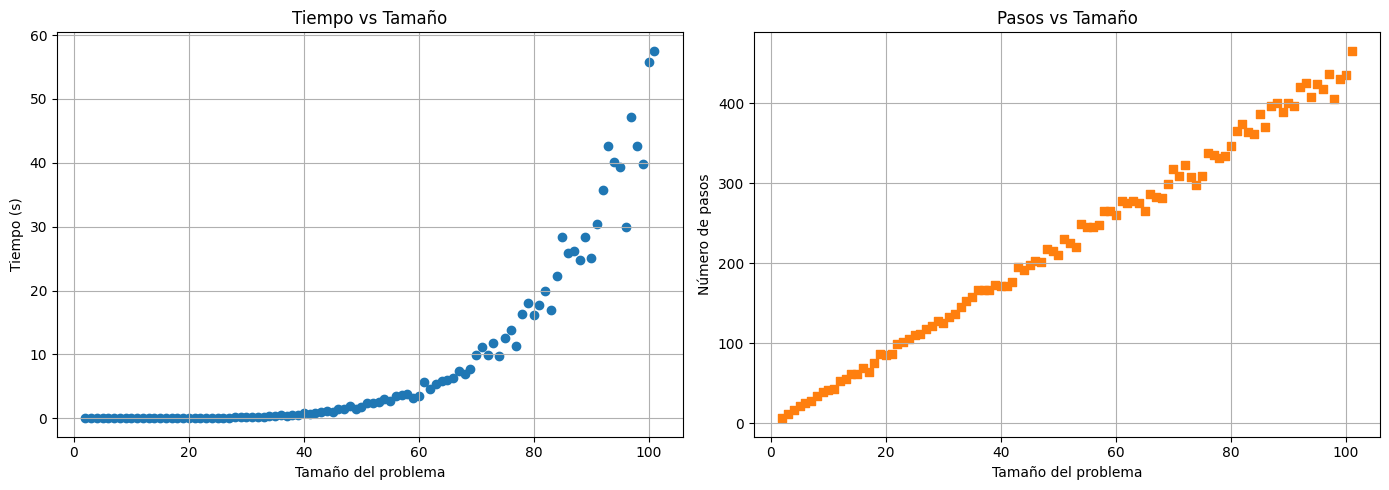

In [15]:
# Ya tienes importado pandas y matplotlib.pyplot, y results_csv_path está definido

# Cargar resultados
results = pd.read_csv(folder_path / "Resultados/resultados_sgplan40.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


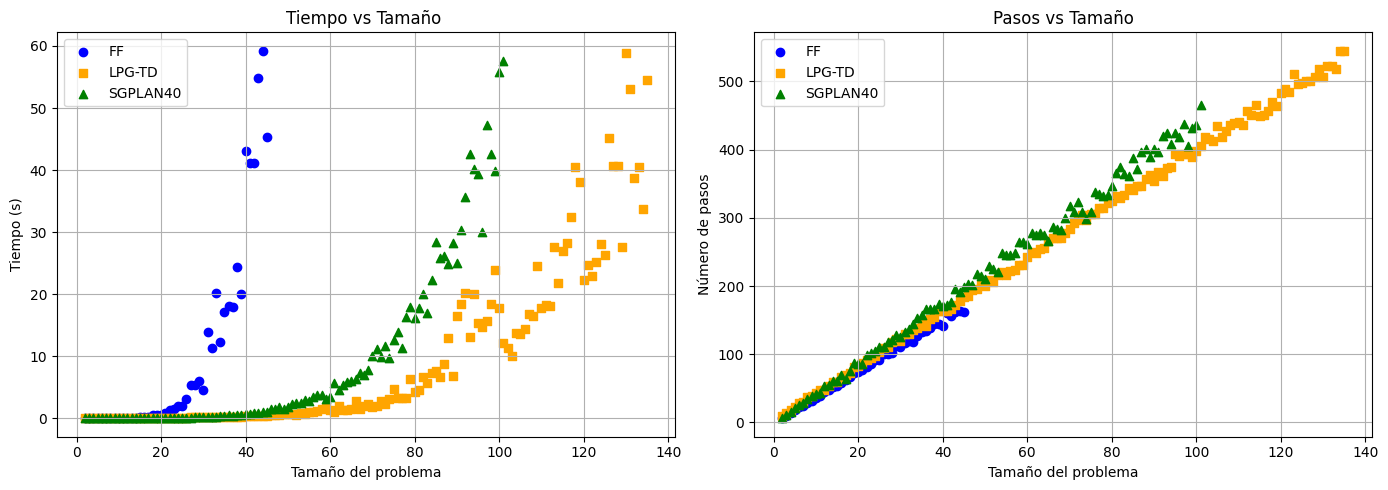


Análisis Estadístico Comparativo

=== Estadísticas para FF ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,23.5,10.80,87.1
1,Mediana,23.5,1.77,88.5
2,Desviación Std,12.8,16.45,48.3
3,Mínimo,2.0,0.00,6.0
4,Máximo,45.0,59.24,164.0



=== Estadísticas para LPG-TD ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,68.5,9.86,275.7
1,Mediana,68.5,2.07,274.5
2,Desviación Std,38.8,13.61,154.1
3,Mínimo,2.0,0.08,10.0
4,Máximo,135.0,58.93,545.0



=== Estadísticas para SGPLAN40 ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,51.5,9.43,225.3
1,Mediana,51.5,2.41,222.5
2,Desviación Std,29.0,13.97,128.6
3,Mínimo,2.0,0.00,6.0
4,Máximo,101.0,57.55,466.0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Cargar resultados de los tres planificadores
ff_df = pd.read_csv(folder_path / "Resultados/resultadosff.csv")
lpg_df = pd.read_csv(folder_path / "Resultados/resultados_lpg-td.csv")
sgplan_df = pd.read_csv(folder_path / "Resultados/resultados_sgplan40.csv")

plt.figure(figsize=(14, 5))
def print_statistics(df, planner_name):
    stats = pd.DataFrame({
        'Métrica': ['Media', 'Mediana', 'Desviación Std', 'Mínimo', 'Máximo'],
        'Tamaño': [
            df['Tamaño'].mean(),
            df['Tamaño'].median(),
            df['Tamaño'].std(),
            df['Tamaño'].min(),
            df['Tamaño'].max()
        ],
        'Tiempo (s)': [
            df['Tiempo (s)'].mean(),
            df['Tiempo (s)'].median(),
            df['Tiempo (s)'].std(),
            df['Tiempo (s)'].min(),
            df['Tiempo (s)'].max()
        ],
        'Pasos': [
            df['Pasos'].mean(),
            df['Pasos'].median(),
            df['Pasos'].std(),
            df['Pasos'].min(),
            df['Pasos'].max()
        ]
    })
    print(f"\n=== Estadísticas para {planner_name} ===")
    display(stats.style.format({
        'Tamaño': '{:.1f}',
        'Tiempo (s)': '{:.2f}',
        'Pasos': '{:.1f}'
    }).set_caption(f"Resumen estadístico - {planner_name}"))
    
    

# Gráfico 1: Tiempo vs Tamaño
plt.subplot(1, 2, 1)
for df, label, color, marker in [
    (ff_df, 'FF', 'blue', 'o'),
    (lpg_df, 'LPG-TD', 'orange', 's'),
    (sgplan_df, 'SGPLAN40', 'green', '^')
]:
    plt.scatter(df['Tamaño'], df['Tiempo (s)'], label=label, 
                marker=marker, color=color)

plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs Tamaño ')
plt.legend()
plt.grid(True)

# Gráfico 2: Pasos vs Tamaño
plt.subplot(1, 2, 2)
for df, label, color, marker in [
    (ff_df, 'FF', 'blue', 'o'),
    (lpg_df, 'LPG-TD', 'orange', 's'),
    (sgplan_df, 'SGPLAN40', 'green', '^')
]:
    plt.scatter(df['Tamaño'], df['Pasos'], label=label, 
                marker=marker, color=color)

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de pasos')
plt.title('Pasos vs Tamaño')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar estadísticas después de los gráficos
print("\n" + "="*50 + "\nAnálisis Estadístico Comparativo\n" + "="*50)
for df, name in [(ff_df, 'FF'), (lpg_df, 'LPG-TD'), (sgplan_df, 'SGPLAN40')]:
    print_statistics(df, name)


In [ ]:
# Eliminar todos los archivos en el directorio de problemas
for file in problem_path.glob("*"):
    try:
        os.remove(file)
        print(f"[INFO] Eliminado archivo: {file}")
    except Exception as e:
        print(f"[ERROR] No se pudo eliminar {file}: {e}")